***Nigel K. Gondo: Data Warrior Analytics***

***Customer Segmentation - Kmeans Clustering & Hierarchial Clustering***

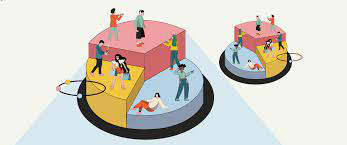

In [1]:
from PIL import Image
Image.open('segmentation.jfif')

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Brief-Description" data-toc-modified-id="Brief-Description-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Brief Description</a></span></li><li><span><a href="#Importing-the-Relevant-Libraries" data-toc-modified-id="Importing-the-Relevant-Libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Importing the Relevant Libraries</a></span></li><li><span><a href="#Data-Importation-and-Cleaning" data-toc-modified-id="Data-Importation-and-Cleaning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Importation and Cleaning</a></span></li><li><span><a href="#Exploratory-Data-Analysis-(EDA)" data-toc-modified-id="Exploratory-Data-Analysis-(EDA)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploratory Data Analysis (EDA)</a></span><ul class="toc-item"><li><span><a href="#Summary-Statistics" data-toc-modified-id="Summary-Statistics-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Summary Statistics</a></span></li><li><span><a href="#Gender-Count-Bar-Chart" data-toc-modified-id="Gender-Count-Bar-Chart-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Gender Count Bar Chart</a></span></li><li><span><a href="#Age-Distribution" data-toc-modified-id="Age-Distribution-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Age Distribution</a></span></li><li><span><a href="#Boxplots" data-toc-modified-id="Boxplots-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Boxplots</a></span></li><li><span><a href="#Removing-outliers(Interquartle-range-method)" data-toc-modified-id="Removing-outliers(Interquartle-range-method)-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Removing outliers(Interquartle range method)</a></span></li><li><span><a href="#Aggregating-Age,-Annual-Income-and-Spending-Score-Using-Mean" data-toc-modified-id="Aggregating-Age,-Annual-Income-and-Spending-Score-Using-Mean-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Aggregating Age, Annual Income and Spending Score Using Mean</a></span></li><li><span><a href="#Viewing-Relationship-of-Annual-Income-and-Spending-Score-with-Scatterplot" data-toc-modified-id="Viewing-Relationship-of-Annual-Income-and-Spending-Score-with-Scatterplot-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>Viewing Relationship of Annual Income and Spending Score with Scatterplot</a></span></li></ul></li><li><span><a href="#Kmeans-Clustering" data-toc-modified-id="Kmeans-Clustering-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Kmeans Clustering</a></span><ul class="toc-item"><li><span><a href="#Calculation-of--Weighted-Clusters-Sum-of-Squares-(WCSS)---Elbow-Curve" data-toc-modified-id="Calculation-of--Weighted-Clusters-Sum-of-Squares-(WCSS)---Elbow-Curve-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Calculation of  Weighted Clusters Sum of Squares (WCSS) - Elbow Curve</a></span></li><li><span><a href="#Fitting-the-Kmeans-Model" data-toc-modified-id="Fitting-the-Kmeans-Model-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Fitting the Kmeans Model</a></span></li><li><span><a href="#Analysing-Kmeans-metrics" data-toc-modified-id="Analysing-Kmeans-metrics-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Analysing Kmeans metrics</a></span></li></ul></li><li><span><a href="#Hierachial-clustering" data-toc-modified-id="Hierachial-clustering-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Hierachial clustering</a></span><ul class="toc-item"><li><span><a href="#Dendrogram" data-toc-modified-id="Dendrogram-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Dendrogram</a></span></li><li><span><a href="#Fitting-the-Agglomerative-model" data-toc-modified-id="Fitting-the-Agglomerative-model-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Fitting the Agglomerative model</a></span></li><li><span><a href="#Analysing-metrics-Agglomerative-vs-Kmeans-(Which-is-the-better-model-to-cluster-with?)" data-toc-modified-id="Analysing-metrics-Agglomerative-vs-Kmeans-(Which-is-the-better-model-to-cluster-with?)-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Analysing metrics Agglomerative vs Kmeans (Which is the better model to cluster with?)</a></span></li></ul></li><li><span><a href="#Final-analysis" data-toc-modified-id="Final-analysis-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Final analysis</a></span></li></ul></div>

# Brief Description

The purpose of this project was to conduct customer segmentation. The best way to tackle this problem was to implement clustering algorithms on the data set.

Clustering is a form of unsupervised machine learning that uses unlabelled data by discovering patterns in the data and then forming natural groups/clusters. There is a hand full of clustering algorithms, but this project will be using Kmeans and Hierarchical (Agglomerative and Divisive) clustering.

**Kmeans** is a simple algorithm that groups data points with randomly selected centroids then the algorithm iterates until the position of these centroids are optimised.

**Hierarchical** clustering makes use of a tree diagram called dendrogram to perform its clustering, and it has two approaches Agglomerative and Divisive. 

(i) **Agglomerative** is a bottom-up approach, where each data point is a cluster and as we go up the hierarchy the clusters are combined.

(ii) **Divisive** is the opposite of Agglomerative, which is a top-down approach where all data points are one cluster and as we go down the hierarchy different clusters are formed.


# Importing the Relevant Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import (silhouette_score, 
                             davies_bouldin_score, 
                             calinski_harabasz_score)
from scipy.cluster.hierarchy import dendrogram, linkage
from tabulate import tabulate
%matplotlib inline
sns.set()
sns.set_style('white')
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
import warnings
warnings.filterwarnings("ignore")


# Data Importation and Cleaning

In [3]:
#Importing csv file with the customer data
df_customer = pd.read_csv('Mall_Customers.csv')
df_customer.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#Checking on data types
df_customer.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Gender should be a categorical data type. This will be changed to make the analysis easier.

In [5]:
#Changing Gender data type from object to category
df_customer.Gender = df_customer.Gender.astype('category')

In [6]:
#Confirming on data type being changed
df_customer.dtypes

CustomerID                   int64
Gender                    category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [7]:
#checking for any duplicate records
df_customer.duplicated().sum() #no duplicate records

0

In [8]:
#dropping the Customer ID as it is not useful for my analysis
df_customer_2 = df_customer.drop(columns='CustomerID', axis=1)
df_customer_2.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
#Checking for null values in the data set
df_customer_2.isnull().sum() #no null values present

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Exploratory Data Analysis (EDA)

## Summary Statistics

In [10]:
#Viewing some summary statistics
df_customer_2.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## Gender Count Bar Chart

Gender Count
╒══════════════════════════════╕
│ Female    112                │
│ Male       88                │
│ Name: Gender, dtype: int64   │
╞══════════════════════════════╡
╘══════════════════════════════╛


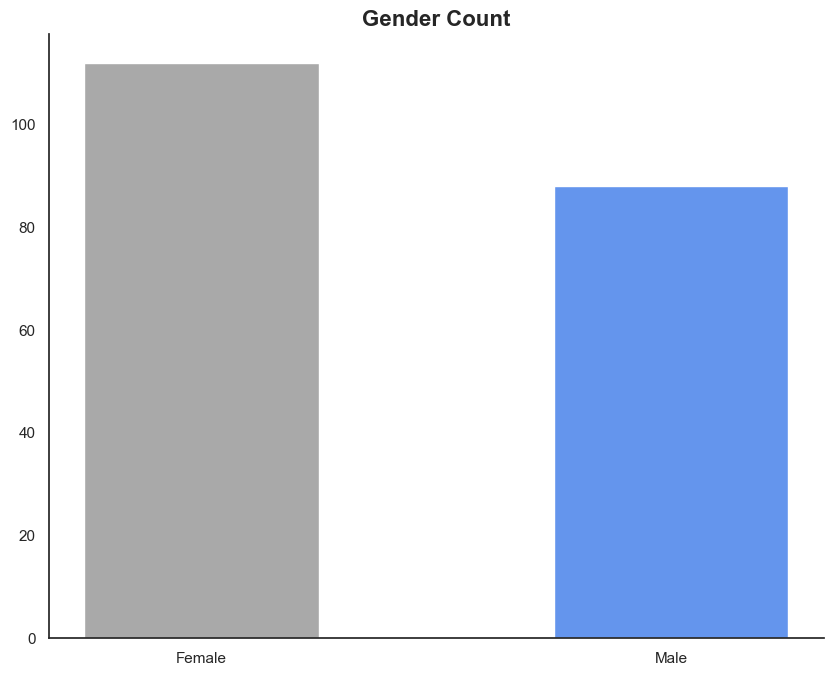

In [11]:
#Counting how many males and females there are in the data set
gender_count = df_customer_2['Gender'].value_counts(dropna = False)
gender_count

table = []
print('Gender Count')
table.append([gender_count])
print(tabulate(table, headers = 'firstrow', tablefmt = 'fancy_grid'))

#Plotting bar chart of gender count
fig, ax = plt.subplots()

plt.bar(gender_count.index, 
        gender_count, 
        color = ['darkgrey','cornflowerblue'],
        width = 0.5)
plt.title('Gender Count',
         fontsize = 16,
         fontweight = 'bold')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)


There is a saying that women love shopping, not surprising then that there are more female shoppers than males.

## Age Distribution

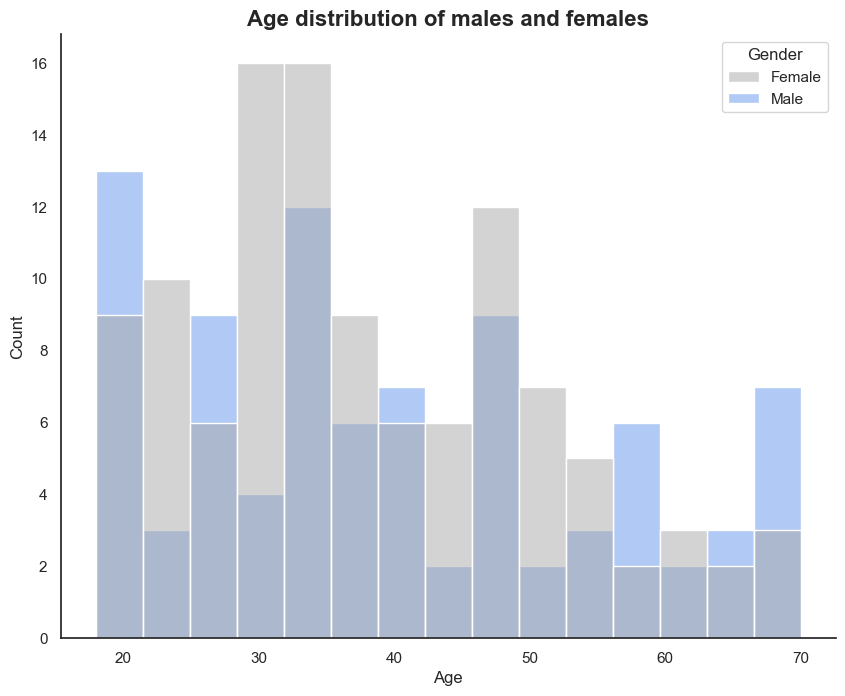

In [12]:
#Plotting the age distribution of both genders
fig, ax = plt.subplots()

sns.histplot(x = 'Age', 
             hue = 'Gender', 
             bins = 15,
             data = df_customer_2, 
             palette=['darkgrey','cornflowerblue'])

plt.title('Age distribution of males and females', 
          fontsize = 16, 
          fontweight = 'bold')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.show()

From the histogram, it is evident that many female shoppers range from their early to mid-thirties. For males, the majority range from their mid-thirties to early forties.

## Boxplots

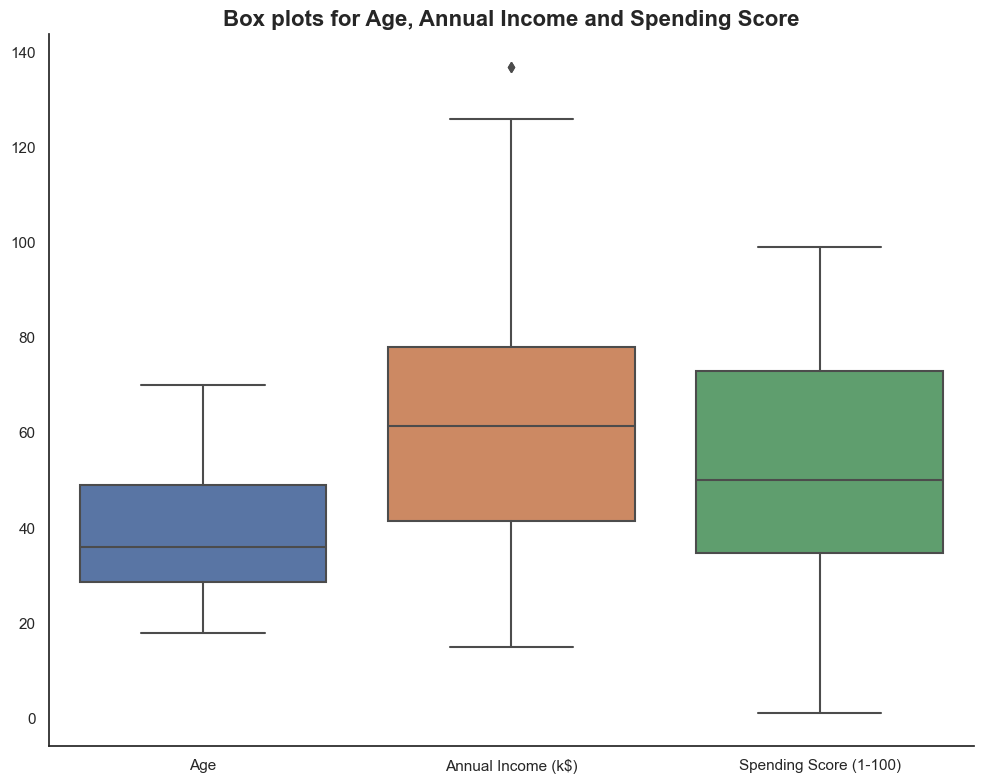

In [13]:
#checking distribution of income using a box plot
fig, ax = plt.subplots()

sns.boxplot(data= df_customer_2[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

plt.title('Box plots for Age, Annual Income and Spending Score', 
          fontsize = 16, 
          fontweight = 'bold')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

## Removing outliers(Interquartle range method)

In [14]:
#Removing outliers using the interquatile range
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(df_customer_2, 'Annual Income (k$)')
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

Upper whisker:  132.75
Lower Whisker:  -13.25


In [15]:
#Viewing the annual income outliers
df_customer_2[(df_customer_2['Annual Income (k$)'] < lower) | (df_customer_2['Annual Income (k$)'] > upper)]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
198,Male,32,137,18
199,Male,30,137,83


In [16]:
#Creating new dataframe without outliers
df_customer_no_outliers = df_customer_2[(df_customer_2['Annual Income (k$)'] > lower) & \
                                        (df_customer_2['Annual Income (k$)'] < upper)]
print('Number of records before outliers are removed:' + str(len(df_customer_2)))
print('Number of records after outliers are removed:' + str(len(df_customer_no_outliers))) 
#the two outliers were removed

Number of records before outliers are removed:200
Number of records after outliers are removed:198


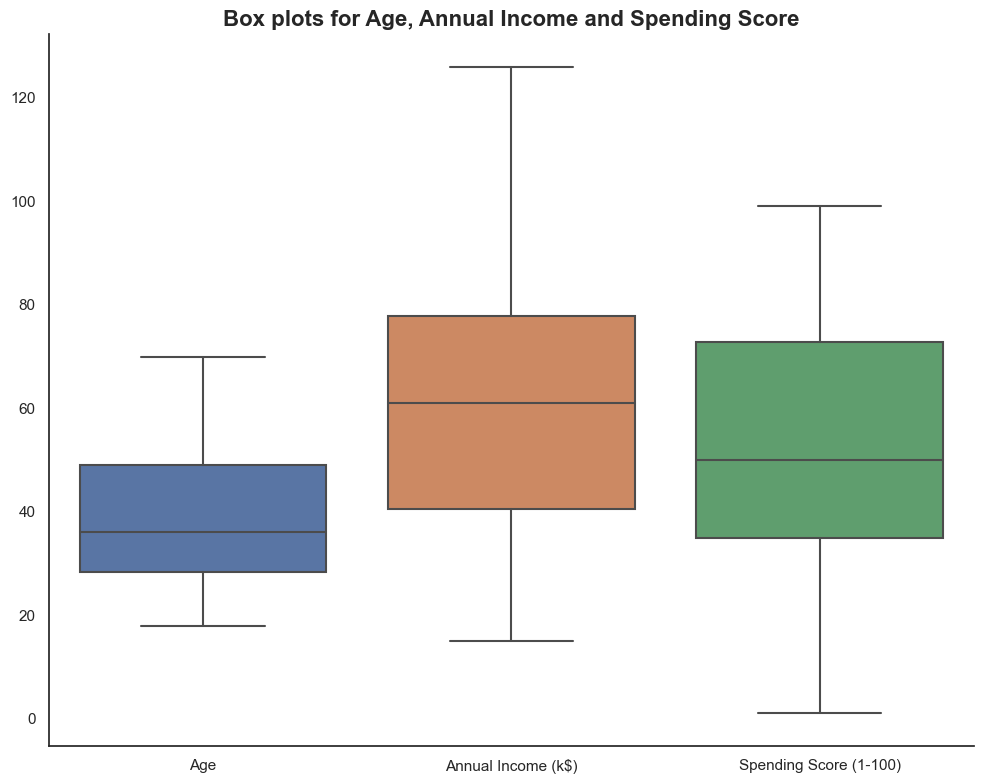

In [17]:
#Visual check of the new boxplots with no outliers
fig, ax = plt.subplots()

sns.boxplot(data= df_customer_no_outliers[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

plt.title('Box plots for Age, Annual Income and Spending Score', 
          fontsize = 16, 
          fontweight = 'bold')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

## Aggregating Age, Annual Income and Spending Score Using Mean 

In [18]:
#Calculation the average age, annual income and spending score for both genders
df_customer_no_outliers_grouped = df_customer_no_outliers.groupby('Gender').mean().round()
df_customer_no_outliers_grouped

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.0,59.0,52.0
Male,40.0,60.0,48.0


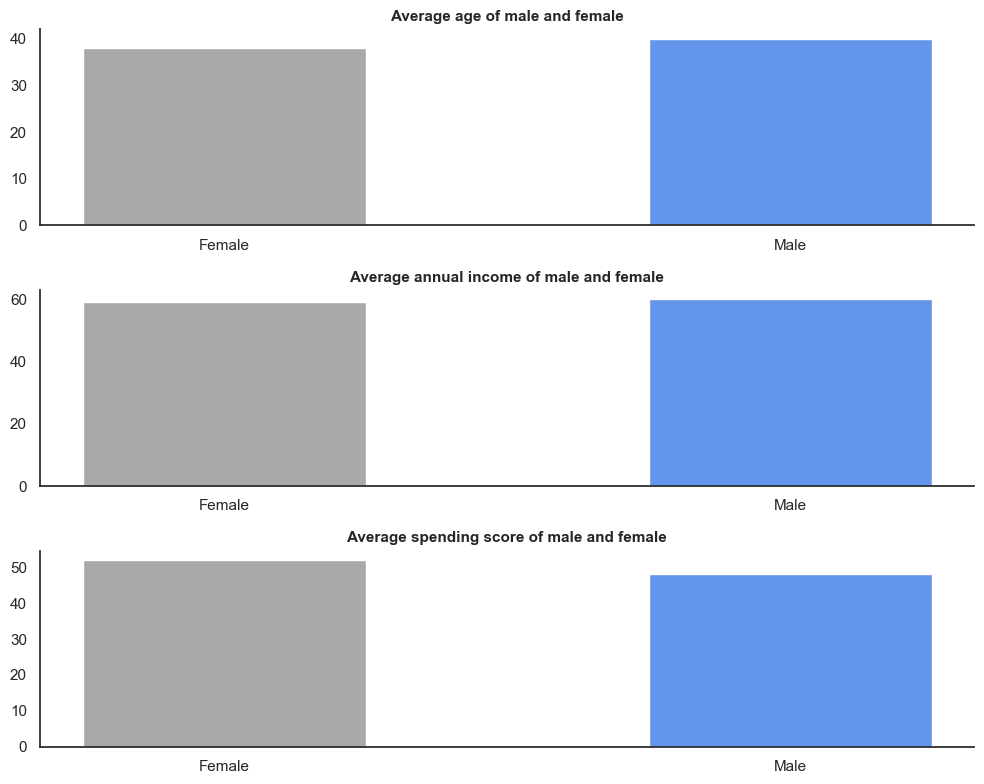

In [19]:
#plotting the average age, annual income and spending score
fig, ax = plt.subplots(3)

#Age bar graph
ax[0].bar(df_customer_no_outliers_grouped.index, 
          df_customer_no_outliers_grouped['Age'], 
          color = ['darkgrey','cornflowerblue'], 
          width = 0.5)

ax[0].set_title('Average age of male and female', 
                fontsize = 11, 
                fontweight = 'bold')

ax[0].spines['top'].set_visible(False)

ax[0].spines['right'].set_visible(False)

#Annual income bar graph
ax[1].bar(df_customer_no_outliers_grouped.index, 
          df_customer_no_outliers_grouped['Annual Income (k$)'], 
          color = ['darkgrey','cornflowerblue'], 
          width = 0.5)

ax[1].set_title('Average annual income of male and female', 
                   fontsize = 11, 
                   fontweight = 'bold')

ax[1].spines['top'].set_visible(False)

ax[1].spines['right'].set_visible(False)

#Spending score bar graph
ax[2].bar(df_customer_no_outliers_grouped.index, 
          df_customer_no_outliers_grouped['Spending Score (1-100)'], 
          color = ['darkgrey','cornflowerblue'], 
          width = 0.5)

ax[2].set_title('Average spending score of male and female', 
                fontsize = 11, 
                fontweight = 'bold')

ax[2].spines['top'].set_visible(False)

ax[2].spines['right'].set_visible(False)

plt.tight_layout()

The average age of female shoppers is slightly younger than that of male shoppers. Although females have an average annual income that is lower than males, they have a higher spending score than males.

## Viewing Relationship of Annual Income and Spending Score with Scatterplot

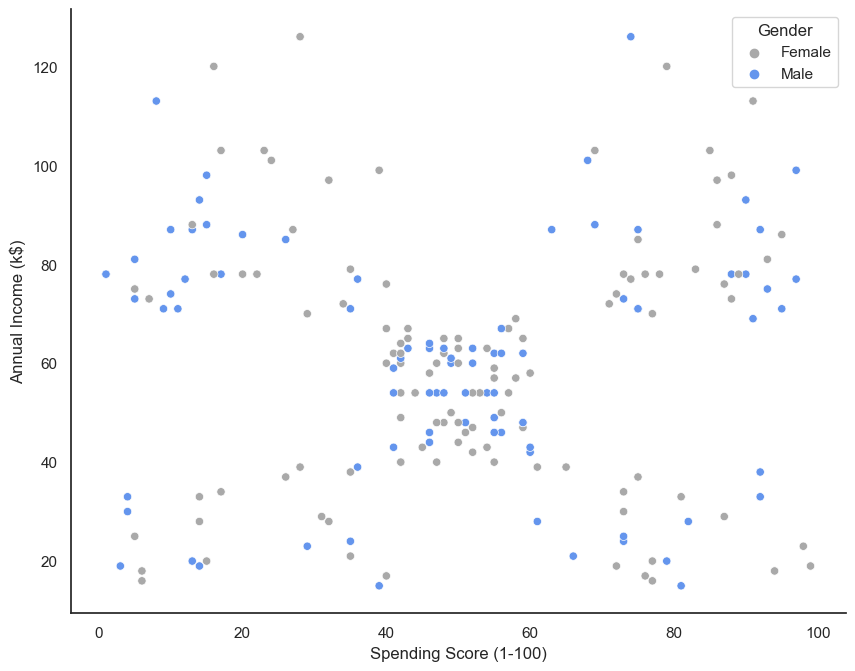

In [20]:
#Creating scactter plots to see if there is an obvious relationship between spending score and annual income
fig, ax = plt.subplots()

sns.scatterplot(x = 'Spending Score (1-100)', 
                y = 'Annual Income (k$)', 
                data = df_customer_no_outliers, 
                hue='Gender', 
                palette=['darkgrey','cornflowerblue'])

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

From the scatter plot it is evident there are clusters present in the data but will utilise the clustering algorithms at my disposal to analyse the clusters.

# Kmeans Clustering 

## Calculation of  Weighted Clusters Sum of Squares (WCSS) - Elbow Curve

WCSS calculates the sum of the squared distances between each data point and the centroid of the cluster.

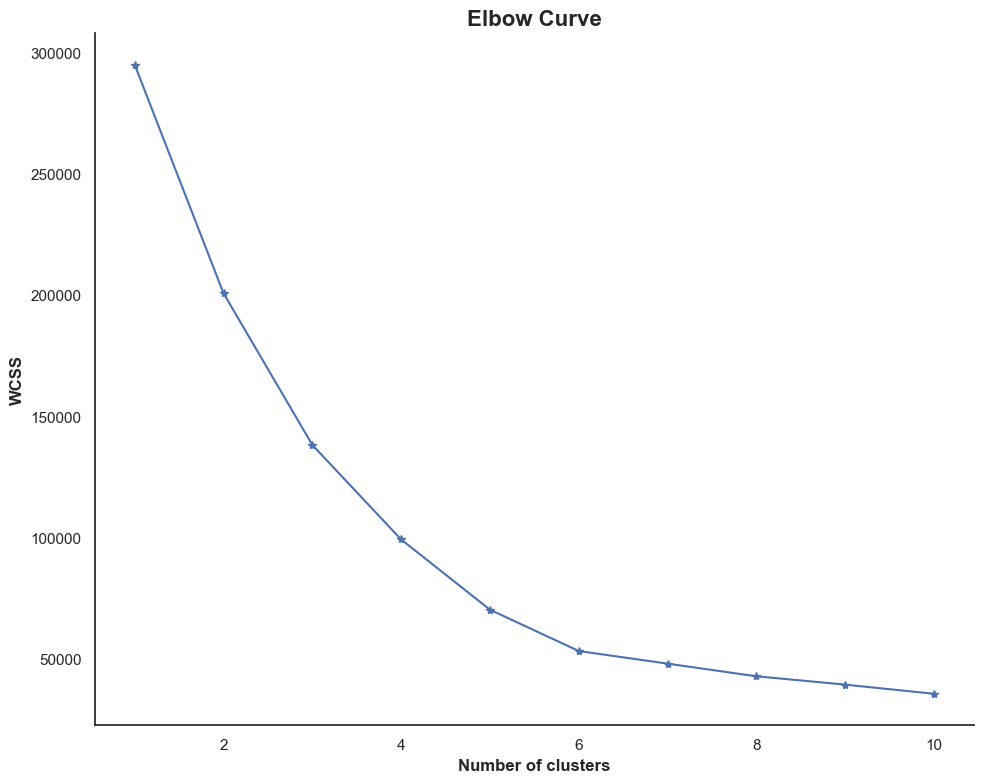

In [21]:
#Elbow curve by calcalting the SSE for different values of k
df_customer_no_outliers_gender_dropped = df_customer_no_outliers.drop(columns='Gender', axis=1)

X =  df_customer_no_outliers_gender_dropped.values #Converting df_customer_no_outliers_gender_dropped into nummpy array
wcss = []
for k in range(1,11):
    
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_) #SSE for each n_clusters
    
 #Plotting the elbow curve   
fig, ax = plt.subplots() 

plt.plot(range(1,11), wcss, marker= '*')

plt.xlabel('Number of clusters', 
           fontweight= 'bold')

plt.ylabel('WCSS', 
           fontweight = 'bold')

plt.title('Elbow Curve',
          fontsize = 16, 
          fontweight = 'bold')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.show()

The best way to determine the optimal number of clusters is by using the Elbow Curve shown above.

Over a predetermined range of clusters (k), this method will be varying the number of clusters. For each value of 'k', the sum of squared Euclidean distance (WCSS) between each point of the cluster and the centroid of the cluster is calculated.

When the WCSS is plotted it will be like an Elbow as illustrated above in figure.

As the number of clusters increases the value of WCSS will decrease. When 'k' is equal to 1 that is when WCSS is at its largest.

Therefore, the point of the elbow will highlight the optimal value for 'k', and in this case, the optimal value for k is six.


## Fitting the Kmeans Model

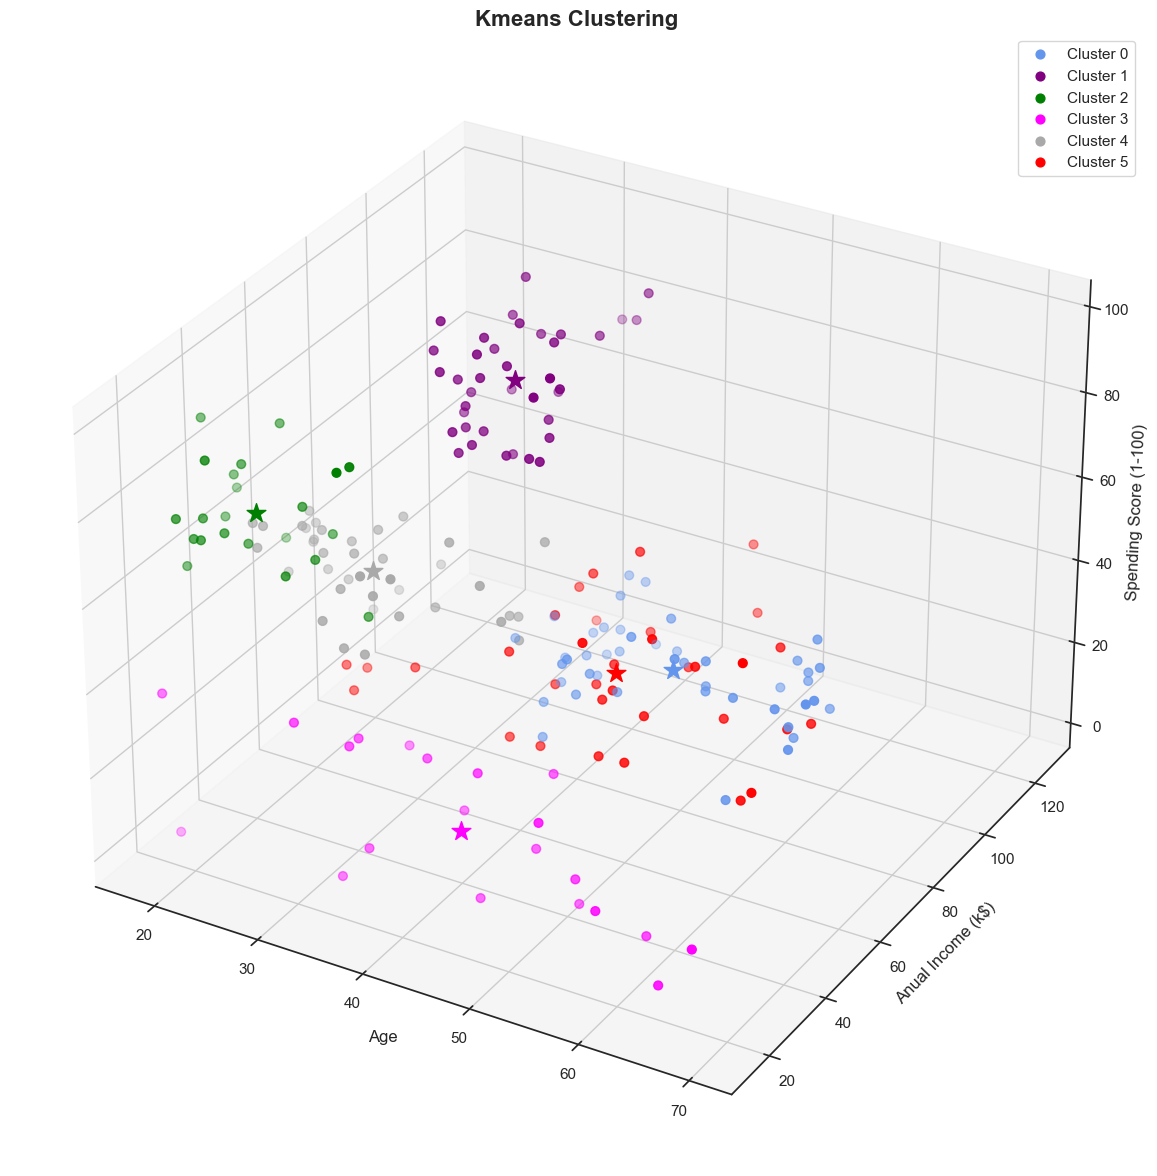

In [22]:
#fitting the model
kmeans = KMeans(n_clusters = 6).fit(X)

#predicting the clusters
y_kmeans = kmeans.fit_predict(X)

#the cluster centroids
centroids = kmeans.cluster_centers_

fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(111, projection = '3d')

#cluster 1
ax.scatter(X[y_kmeans == 0, 0], 
           X[y_kmeans == 0, 1], 
           X[y_kmeans == 0, 2], 
           s = 40 , 
           color = 'cornflowerblue', 
           label = "Cluster 0")

ax.scatter(centroids[0,0], 
           centroids[0,1],
           centroids[0,2],
           s = 200, 
           marker = '*', 
           color = 'cornflowerblue')
#cluster 2
ax.scatter(X[y_kmeans == 1, 0], 
           X[y_kmeans == 1, 1], 
           X[y_kmeans == 1, 2], 
           s = 40, 
           color = 'purple', 
           label = "Cluster 1")

ax.scatter(centroids[1,0], 
           centroids[1,1],
           centroids[1,2],
           s = 200, 
           marker = '*', 
           color = 'purple')

#cluster 3
ax.scatter(X[y_kmeans == 2, 0], 
           X[y_kmeans == 2, 1], 
           X[y_kmeans == 2, 2], 
           s = 40 , 
           color = 'green', 
           label = "Cluster 2")

ax.scatter(centroids[2,0], 
           centroids[2,1],
           centroids[2,2],
           s = 200, 
           marker = '*', 
           color = 'green')


#cluster 4
ax.scatter(X[y_kmeans == 3, 0], 
           X[y_kmeans == 3, 1], 
           X[y_kmeans == 3, 2], 
           s = 40 , 
           color = 'magenta', 
           label = "Cluster 3")

ax.scatter(centroids[3,0], 
           centroids[3,1],
           centroids[3,2],
           s = 200, 
           marker = '*', 
           color = 'magenta')

#cluster 5
ax.scatter(X[y_kmeans == 4, 0], 
           X[y_kmeans == 4, 1], 
           X[y_kmeans == 4, 2], 
           s = 40, 
           color = 'darkgrey', 
           label = "Cluster 4")

ax.scatter(centroids[4,0], 
           centroids[4,1],
           centroids[4,2],
           s = 200, 
           marker = '*', 
           color = 'darkgrey')

#cluster 6
ax.scatter(X[y_kmeans == 5, 0], 
           X[y_kmeans == 5, 1], 
           X[y_kmeans == 5, 2], 
           s = 40, 
           color = 'red', 
           label = "Cluster 5")
ax.scatter(centroids[5,0], 
           centroids[5,1],
           centroids[5,2],
           s = 200, 
           marker = '*', 
           color = 'red')

plt.title('Kmeans Clustering', 
          fontsize = 16, 
          fontweight = 'bold')

ax.set_xlabel('Age')

ax.set_ylabel('Anual Income (k$)')

ax.set_zlabel('Spending Score (1-100)')

ax.legend()

plt.show()


## Analysing Kmeans metrics

**What is the Silhouette Score?**

The silhouette score meausres the seperation distance between clusters.uses the mean intra-cluster distance and the mean nearest-cluster distance. This score is between -1 and +1, where the higher the score, as it approaches +1 it signifies the further away the cluster samples are from the neighbouring cluster samples.


**What is Davies-Bouldin Index?**

The average similarity of each cluster with its most similar cluster. The lower the score the better separation there is between your clusters.


**What is the Calinski-Harabaz Score?**

alculated using the between-cluster dispersion and within-cluster dispersion in order to measure the distinctiveness between groups. Like the Silhouette Score, the higher the score the more well-defined the clusters are. This score has no bound, meaning that there is no ‘acceptable’ or ‘good’ value.



In [23]:
#metrics
silhouette_score_kmeans = round(silhouette_score(X, y_kmeans),2)
davies_bouldin_score_kmeans = round(davies_bouldin_score(X, y_kmeans),2)
calinski_harabasz_score_kmeans = round(calinski_harabasz_score(X, y_kmeans),2)

#printing in table form
table = []
print('*Clustering metrics*')

table.append(['Clustering Model', 
              'Silhouette Score', 
              'Davies Bouldin Score',
              'Calinski Harabasz Score'])

table.append(['K - Means clustering', 
              silhouette_score_kmeans, 
              davies_bouldin_score_kmeans,
              calinski_harabasz_score_kmeans])

print(tabulate(table, headers = 'firstrow', tablefmt = 'pretty'))

*Clustering metrics*
+----------------------+------------------+----------------------+-------------------------+
|   Clustering Model   | Silhouette Score | Davies Bouldin Score | Calinski Harabasz Score |
+----------------------+------------------+----------------------+-------------------------+
| K - Means clustering |       0.46       |         0.74         |         174.63          |
+----------------------+------------------+----------------------+-------------------------+


# Hierachial clustering


## Dendrogram

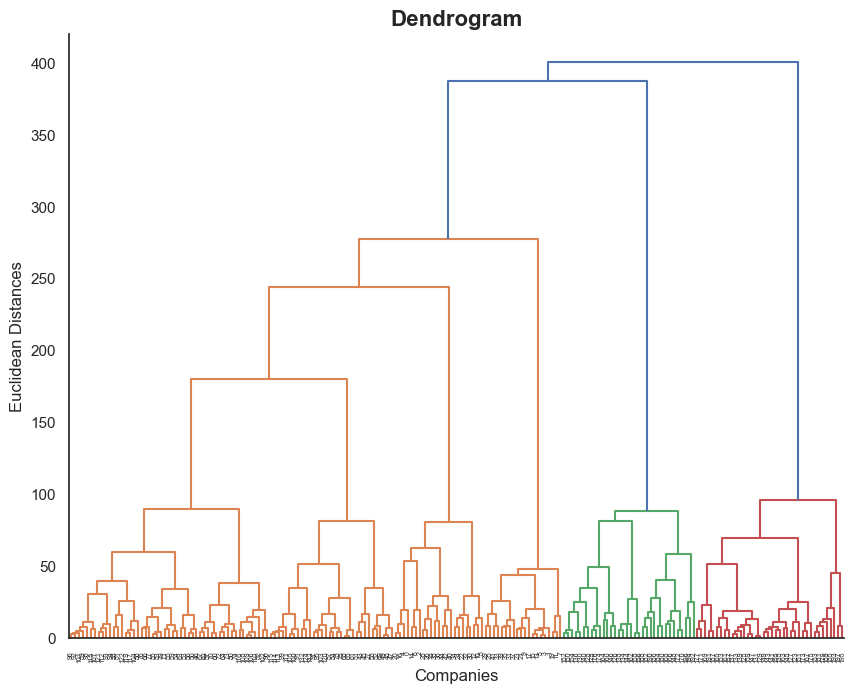

In [24]:
linked = linkage(X, 
                 method='ward',
                 metric = 'euclidean') 

fig, ax = plt.subplots()

dendrogram(linked, 
           orientation='top',
           distance_sort='descending')

plt.title('Dendrogram', 
          fontsize = 16, 
          fontweight = 'bold')

plt.xlabel('Companies')

plt.ylabel('Euclidean Distances')

ax.spines['top'].set_visible(False)

ax.spines['right'].set_visible(False)

plt.show()

The optimal number of clusters is 3

## Fitting the Agglomerative model

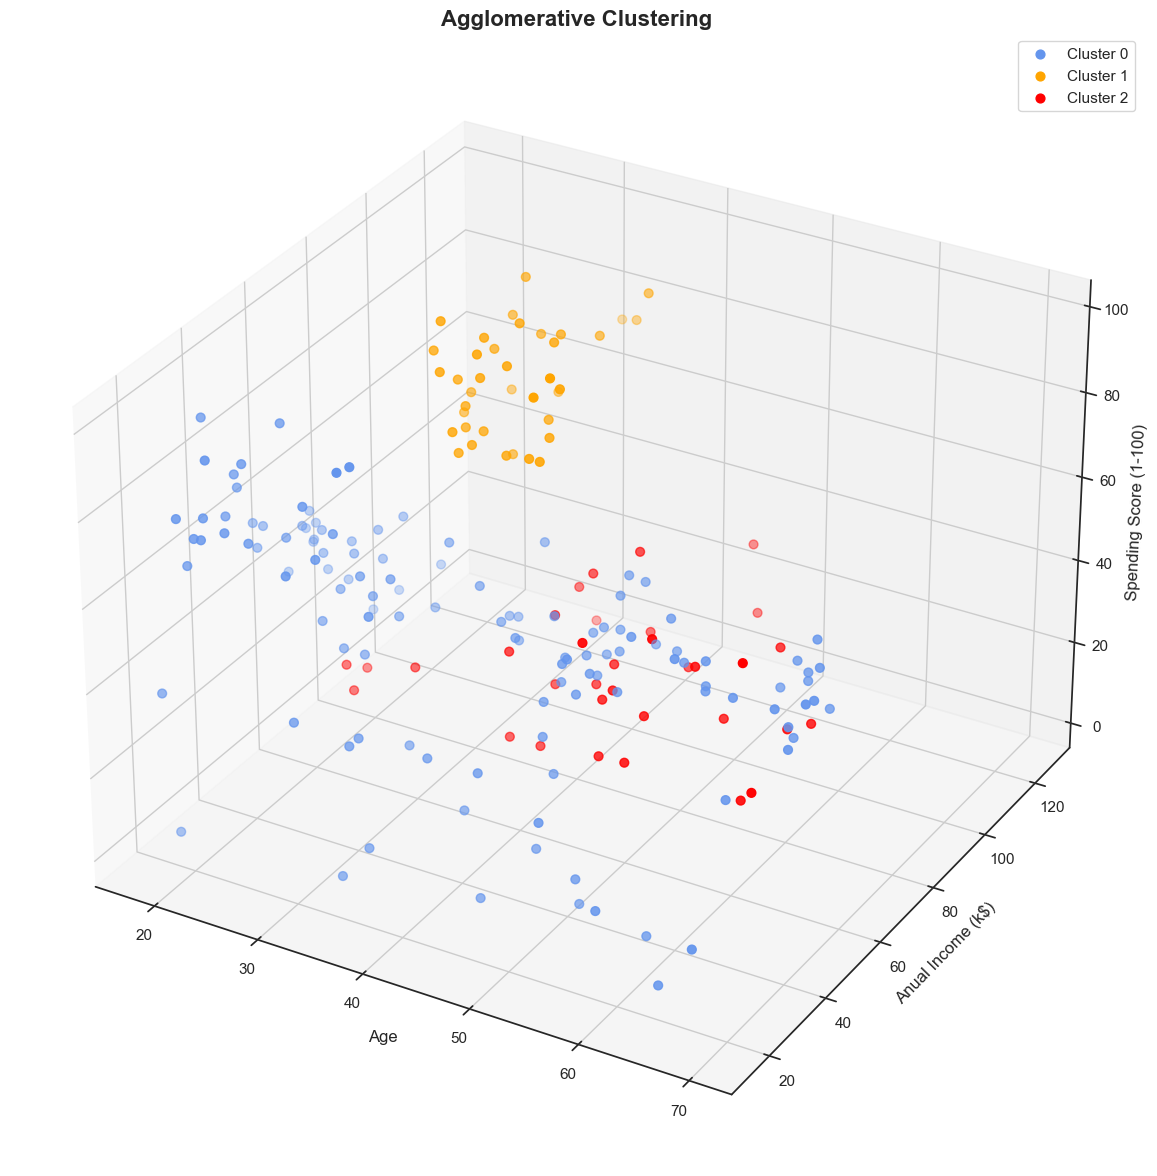

In [25]:
#fitting the model
hc = AgglomerativeClustering(n_clusters = 3, 
                             affinity = 'euclidean', 
                             linkage = 'ward')

#predicting the cluster
y_hc = hc.fit_predict(X)

#plotting the clusters
fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(111, projection = '3d')

#cluster 1
ax.scatter(X[y_hc == 0, 0], 
           X[y_hc == 0, 1], 
           X[y_hc == 0, 2], 
           s = 40 , 
           color = 'cornflowerblue', 
           label = "Cluster 0")

#cluster 2
ax.scatter(X[y_hc == 1, 0], 
           X[y_hc == 1, 1], 
           X[y_hc == 1, 2], 
           s = 40 , 
           color = 'orange', 
           label = "Cluster 1")

#cluster 3
ax.scatter(X[y_hc == 2, 0], 
           X[y_hc == 2, 1], 
           X[y_hc == 2, 2], 
           s = 40 , 
           color = 'red', 
           label = "Cluster 2")

plt.title('Agglomerative Clustering', 
          fontsize = 16, 
          fontweight = 'bold')

ax.set_xlabel('Age')

ax.set_ylabel('Anual Income (k$)')

ax.set_zlabel('Spending Score (1-100)')

ax.legend()

plt.show()



## Analysing metrics Agglomerative vs Kmeans (Which is the better model to cluster with?)

In [26]:
#Metrics
silhouette_score_hc = round(silhouette_score(X, y_hc), 2)
davies_bouldin_score_hc = round(davies_bouldin_score(X, y_hc), 2)
calinski_harabasz_score_hc = round(calinski_harabasz_score(X, y_hc), 2)

#printing in table form
table = []
print('*Clustering metrics*')
table.append(['Clustering Model', 
              'Silhouette Score', 
              'Davies Bouldin Score',
              'Calinski Harabasz Score'])

table.append(['Agglomerative Clustering', 
              silhouette_score_hc, 
              davies_bouldin_score_hc,
              calinski_harabasz_score_hc])

table.append(['K - Means clustering', 
              silhouette_score_kmeans, 
              davies_bouldin_score_kmeans,
              calinski_harabasz_score_kmeans])

print(tabulate(table, headers = 'firstrow', tablefmt = 'pretty'))

*Clustering metrics*
+--------------------------+------------------+----------------------+-------------------------+
|     Clustering Model     | Silhouette Score | Davies Bouldin Score | Calinski Harabasz Score |
+--------------------------+------------------+----------------------+-------------------------+
| Agglomerative Clustering |       0.38       |         0.86         |         108.22          |
|   K - Means clustering   |       0.46       |         0.74         |         174.63          |
+--------------------------+------------------+----------------------+-------------------------+


The higher the silhouette score the better the model and Kmeans has the higher score.

The lower the davies bouldin score the better the model and Kmeans has the lower score of the two.

just like the silhouette score, the higher the calinski harabaz score the better the model and Kmeans has the higher score.


So overall the Kmeans algorithm is the better algorithm to cluster this data.

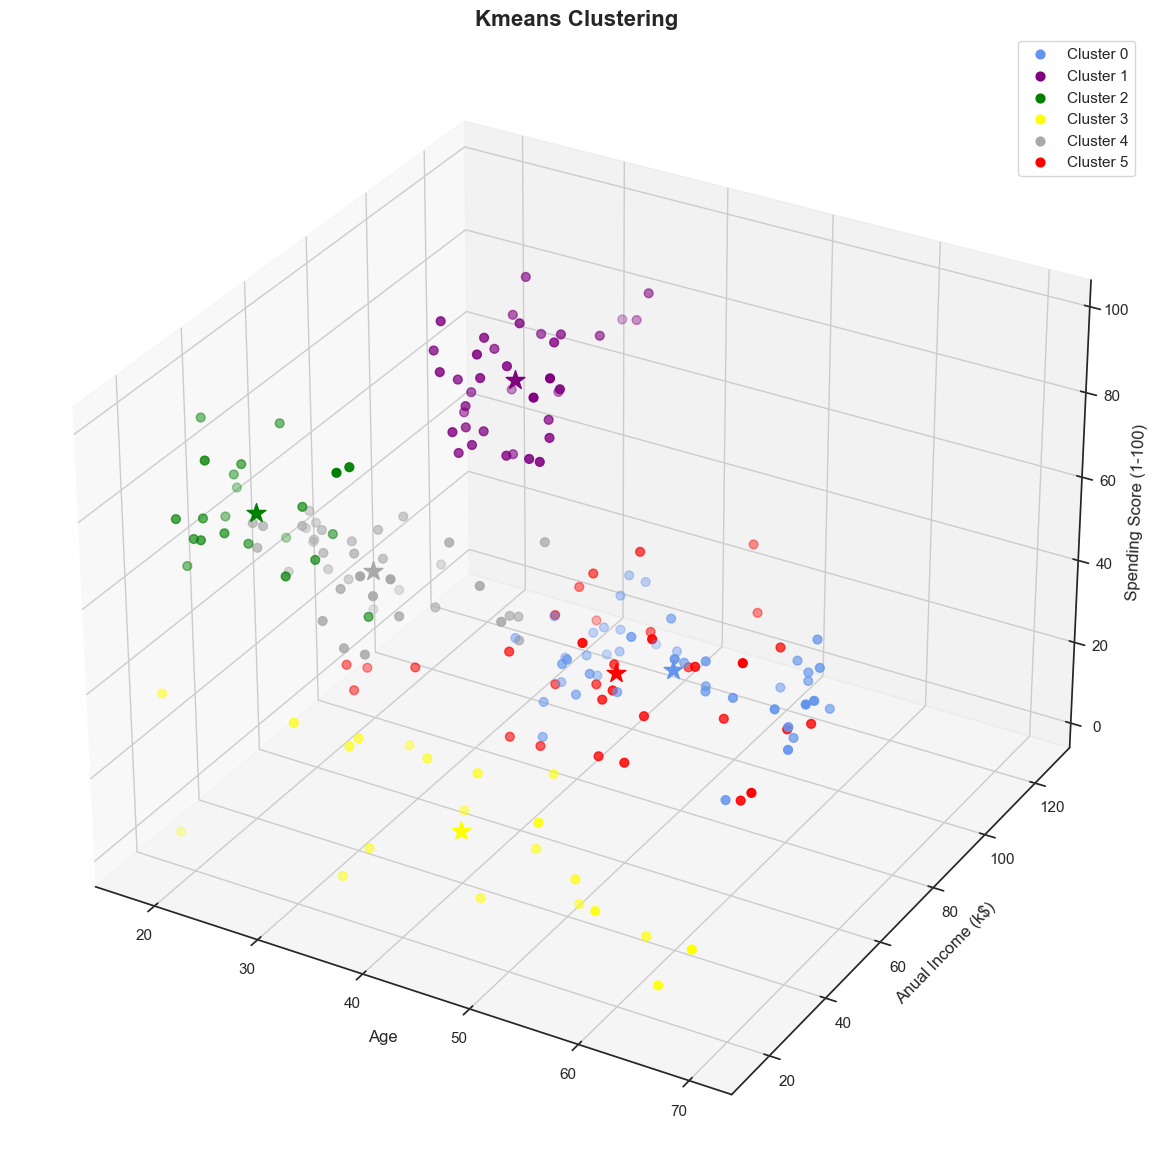

In [27]:

fig = plt.figure(figsize = (15,15))

ax = fig.add_subplot(111, projection = '3d')

#cluster 0
ax.scatter(X[y_kmeans == 0, 0], 
           X[y_kmeans == 0, 1], 
           X[y_kmeans == 0, 2], 
           s = 40 , 
           color = 'cornflowerblue', 
           label = "Cluster 0")

ax.scatter(centroids[0,0], 
           centroids[0,1],
           centroids[0,2],
           s = 200, 
           marker = '*', 
           color = 'cornflowerblue')
#cluster 1
ax.scatter(X[y_kmeans == 1, 0], 
           X[y_kmeans == 1, 1], 
           X[y_kmeans == 1, 2], 
           s = 40, 
           color = 'purple', 
           label = "Cluster 1")

ax.scatter(centroids[1,0], 
           centroids[1,1],
           centroids[1,2],
           s = 200, 
           marker = '*', 
           color = 'purple')

#cluster 3
ax.scatter(X[y_kmeans == 2, 0], 
           X[y_kmeans == 2, 1], 
           X[y_kmeans == 2, 2], 
           s = 40 , 
           color = 'green', 
           label = "Cluster 2")

ax.scatter(centroids[2,0], 
           centroids[2,1],
           centroids[2,2],
           s = 200, 
           marker = '*', 
           color = 'green')


#cluster 4
ax.scatter(X[y_kmeans == 3, 0], 
           X[y_kmeans == 3, 1], 
           X[y_kmeans == 3, 2], 
           s = 40 , 
           color = 'yellow', 
           label = "Cluster 3")

ax.scatter(centroids[3,0], 
           centroids[3,1],
           centroids[3,2],
           s = 200, 
           marker = '*', 
           color = 'yellow')

#cluster 5
ax.scatter(X[y_kmeans == 4, 0], 
           X[y_kmeans == 4, 1], 
           X[y_kmeans == 4, 2], 
           s = 40, 
           color = 'darkgrey', 
           label = "Cluster 4")

ax.scatter(centroids[4,0], 
           centroids[4,1],
           centroids[4,2],
           s = 200, 
           marker = '*', 
           color = 'darkgrey')

#cluster 6
ax.scatter(X[y_kmeans == 5, 0], 
           X[y_kmeans == 5, 1], 
           X[y_kmeans == 5, 2], 
           s = 40, 
           color = 'red', 
           label = "Cluster 5")
ax.scatter(centroids[5,0], 
           centroids[5,1],
           centroids[5,2],
           s = 200, 
           marker = '*', 
           color = 'red')

plt.title('Kmeans Clustering', 
          fontsize = 16, 
          fontweight = 'bold')

ax.set_xlabel('Age')

ax.set_ylabel('Anual Income (k$)')

ax.set_zlabel('Spending Score (1-100)')

ax.legend()

plt.show()

# Final analysis

From the Kmeans cluster plot, it is clear there are six clusters. But the most interesting are cluster zero and cluster two (blue and green respectively). These clusters are characterised by people with a high income but a low spending score. So, there is a need for further analysis to determine if these customers are unsatisfied with the products or services that they get at the mall, or even if the mall lacks certain products and services that these people in this cluster want. So, therefore, there could be a need to improve on the current offering or bring in a whole new range of goods and services. 

Cluster 1 (purple) is another interesting cluster with people with a low income and high spending score. this cluster looks to be a younger demographic between 20 and 30 so they tend to have lower incomes. Here the mall should capitalise on strategies such as promotions to incentivise these clusters to continue spending.

Cluster 4 (dark grey) has individuals who have high incomes and are high spenders so the mall should aim to keep on retaining these consumers.
